### DGMD S-14 WEARABLE DEVICES AND COMPUTER VISION

### Harvard Extension School <br/>
**Summer 2020**<br/>
### Mariam Gogia & Artin Bogdanov
<hr style="height:2pt">


### Description

In this notebook we explore the sensorTile measurements for left and right swipes. We start by visualizing swipes data in several different ways. This is to observe the relationship between features and identify the ones to extract for our Machine Learning model. We observe that 1 swipe corresponds to 4 data frames, in other words, each four row of our data represents one swipe. We manipulated the data by compressing these 4 frames into one. This was done by taking, mean, standard deviation, maximum and minimum points of certain features of each four row of the data. At the end, we take the manipulated data and feed it to different ML models to determine the best model for our problem. The analysis of effectivenes of different ML models is done by using logarithmic loss coefficients. 


#### Reading data files

In [5]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = os.path.join(os.getcwd(), '..', 'labeled_data')
#print(data_path)

#Paths swipe cvs files
path_swipe_left =  os.path.join(data_path, 'swipe_left/*.csv')
path_swipe_right =  os.path.join(data_path, 'swipe_right/*.csv')
path_swipe_left_40 = os.path.join(data_path, 'swipe_left_40/swipe_left_40.csv')
path_swipe_right_40 = os.path.join(data_path, 'swipe_right_40/swipe_right_40.csv')
path_all_swipes = os.path.join(data_path, 'all_swipes.csv')


#### Creating arrays to store each labeled data file

In [6]:
#For Activity 1 - Hopping on one leg
swipe_left_files = np.array([])
swipe_right_files = np.array([])

####  Pushing files into created arrays

In [7]:
# For activity 1 - Hopping on one leg
for swipe_frame_l in glob.glob(path_swipe_left):
    swipe_left_files = np.append(swipe_left_files , swipe_frame_l)

for swipe_frame_r in glob.glob(path_swipe_right):
    swipe_right_files = np.append(swipe_right_files , swipe_frame_r)
    
#print(swipe_left_files)
#print(swipe_right_files)

#### Reading files for visualization

In [8]:
# There are 11 files in swipe_left/right_files folders and each file contains a swipe data for 10 swipes
# picking a random file [7] out of the 11 files for visualization

df_swipe_left = pd.read_csv(swipe_left_files[7])
df_swipe_right = pd.read_csv(swipe_right_files[7])

# swipe_left/right_40 contains swipe data for 40 swipes instead of 10

df_40_left = pd.read_csv(path_swipe_left_40, engine='python')
df_40_right = pd.read_csv(path_swipe_right_40, engine='python')

# all_swipes contains swipe data of all 110 left and 110 right swipes
df_all_swipes = pd.read_csv(path_all_swipes)

# We chose to display swipes in different quantities to get better insights of the data


In [9]:
df_40_left.head()

,sequence,id,r,theta,phi,acc_x,acc_y,acc_z,abs_a,g_x,...,delta_acc_x,delta_acc_y,delta_acc_z,delta_abs_acc,delta_g_x,delta_g_y,delta_g_z,delta_abs_g,theta_phi,label
0,1,10000000,844.058,33.110,-179.005,-125,-95,1024,1035.966,3290,...,30,-1,1118,31.474,3570,-1540,-2310,3377,212.115,swipe left
1,2,10000000,2285.946,53.740,104.066,-461,-8,707,844.058,-11620,...,-336,87,802,-191.908,-14910,-55790,-3080,54607,-50.326,swipe left
2,3,10000000,2287.498,52.674,0.346,-448,1788,1352,2285.946,-50750,...,13,1796,1360,1441.888,-39130,107310,494410,-39442,52.328,swipe left
3,4,10000000,901.226,7.747,-145.394,1819,-11,1387,2287.498,100170,...,2267,-1799,-401,1.552,150920,6580,-753060,26395,153.141,swipe left
4,10,11000000,1003.130,18.731,175.192,-205,-23,1007,1027.911,1400,...,-19,19,1049,8.911,980,-980,-140,1015,-156.461,swipe left


#### The data holds 25 columns. The sequence, id, the accelerations and gyroscopes measures in 3 dimensional space (x, y, z), absolute values of acceleration and gyroscope, the angles - theta, phi, and deltas of all above mentioned features, and the label

#### Plotting acceleration data of 40 swipes of left and right

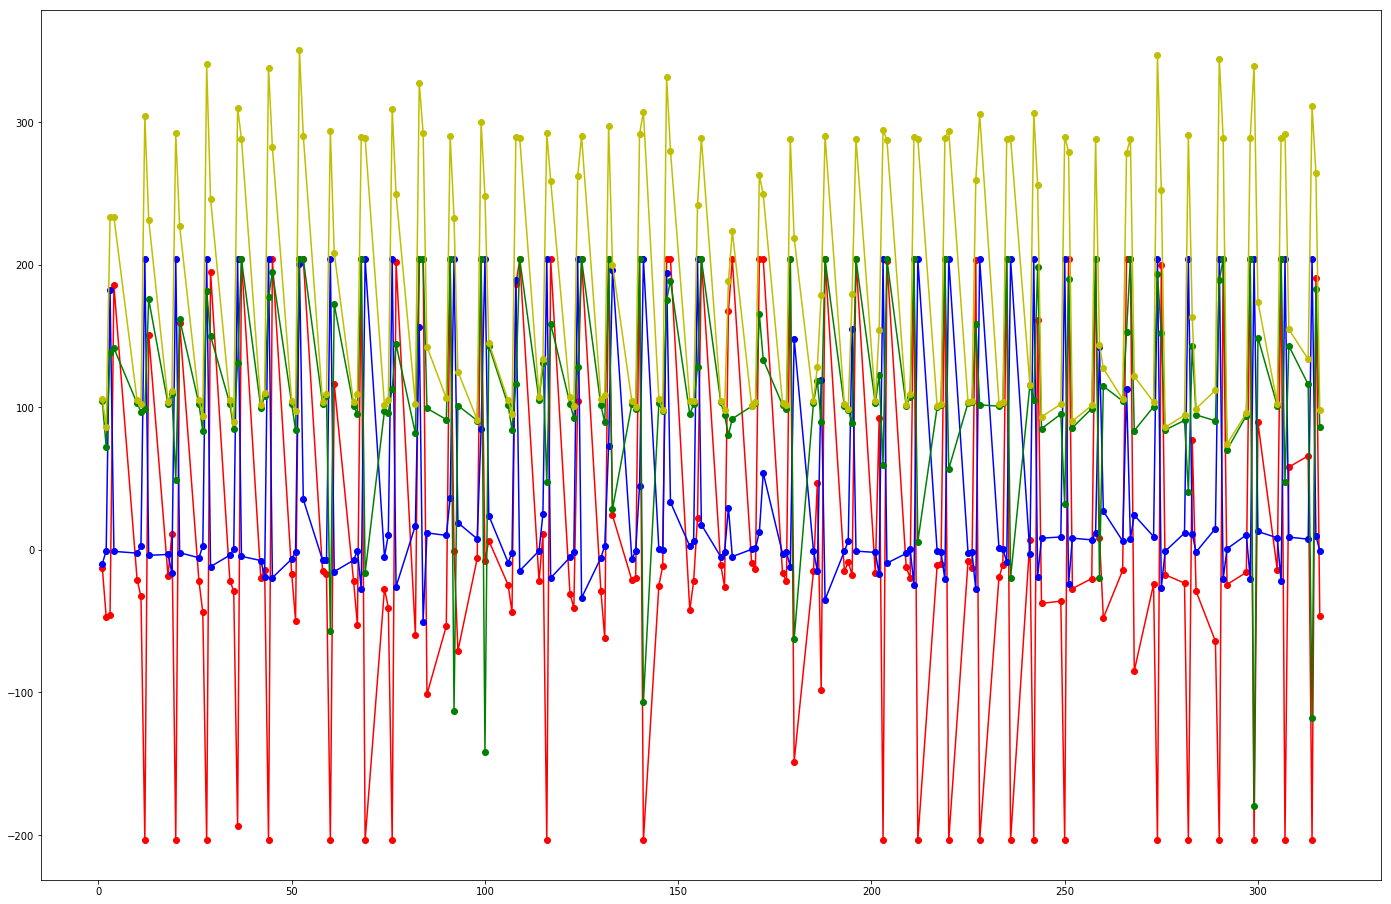

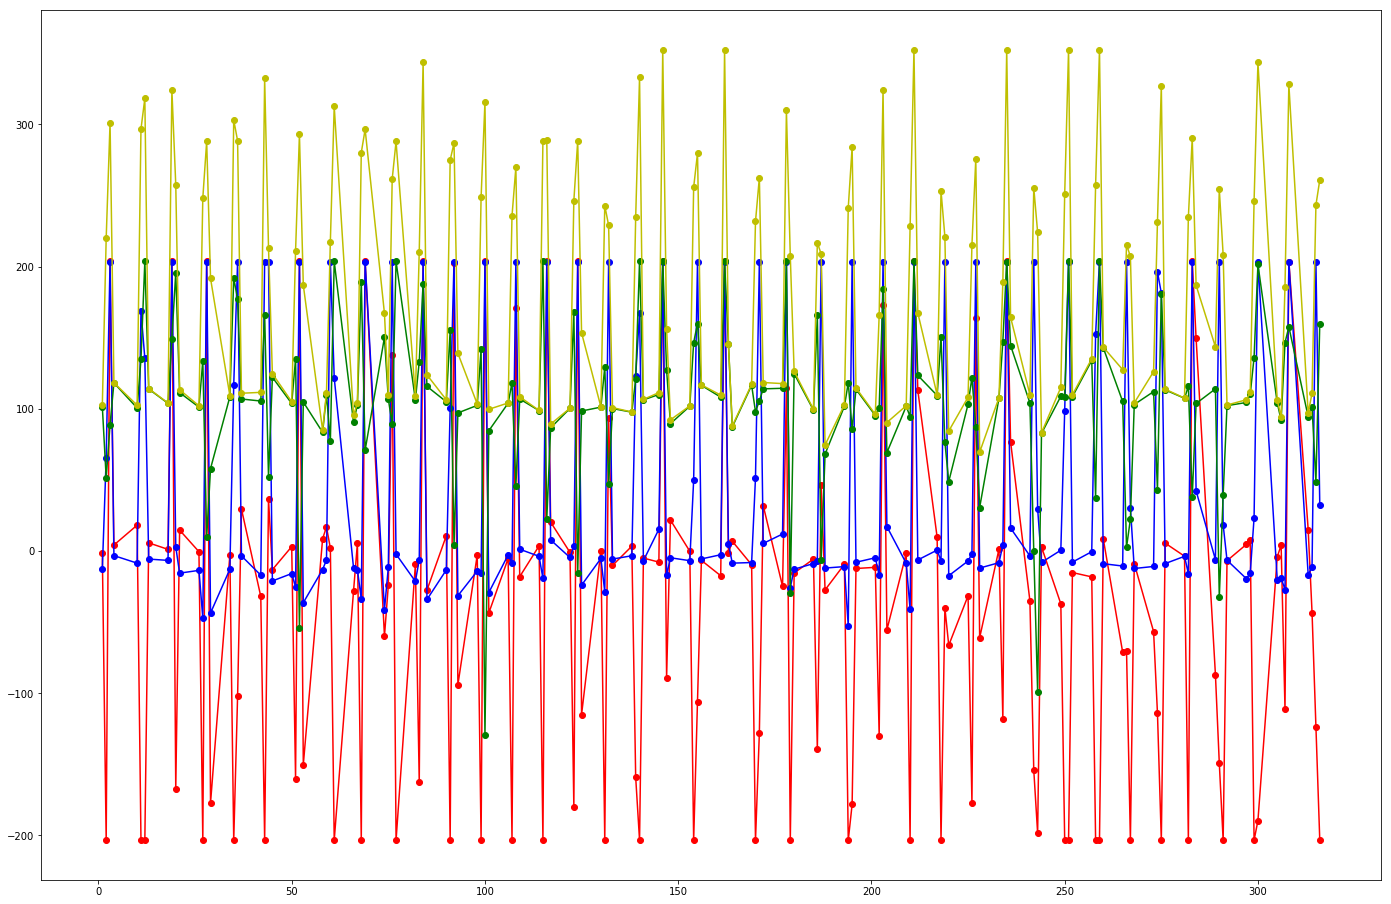

In [10]:
# Dividing acceleration measurements on 9.81 to remove the effect of gravity
acc_x = df_40_left['acc_x']/9.81
acc_y = df_40_left['acc_y']/9.81
acc_z = df_40_left['acc_z']/9.81
acc_abs = df_40_left['abs_a']/9.81
time = df_40_left['sequence']
plt.figure(figsize=(24,16))
plt.plot(time, acc_x, "ro-")
plt.plot(time, acc_y, "bo-")
plt.plot(time,acc_z, "go-")
plt.plot(time,acc_abs,"yo-")

acc_x = df_40_right['acc_x']/9.81
acc_y = df_40_right['acc_y']/9.81
acc_z = df_40_right['acc_z']/9.81
acc_abs = df_40_right['abs_a']/9.81
time = df_40_right['sequence']
plt.figure(figsize=(24,16))
plt.plot(time, acc_x, "ro-")
plt.plot(time, acc_y, "bo-")
plt.plot(time,acc_z, "go-")
plt.plot(time,acc_abs,"yo-")

#### Plotting the gyroscope data of 40 swipes of left and right

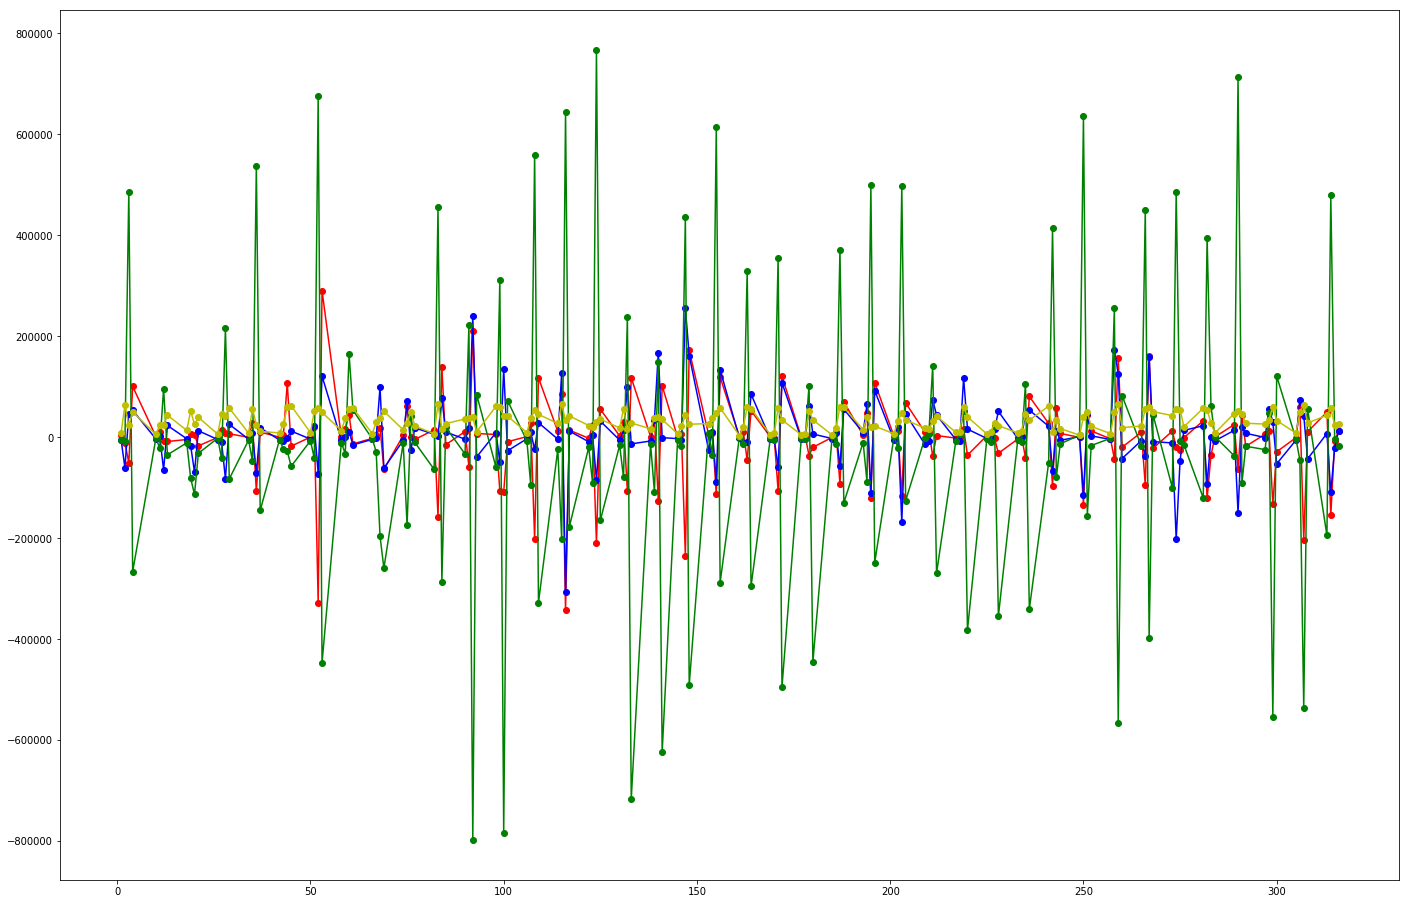

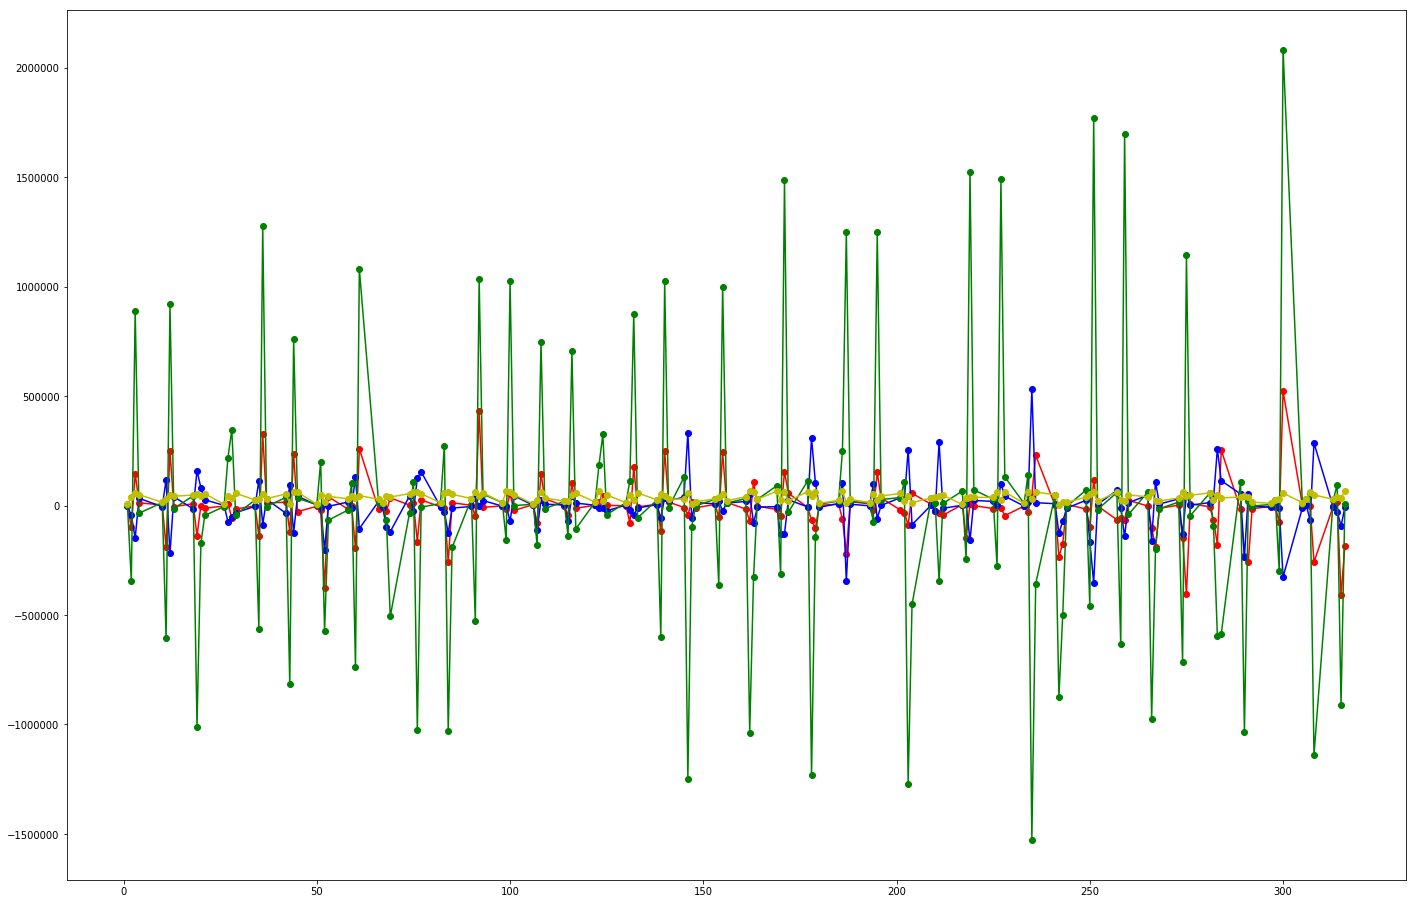

In [11]:
g_x = df_40_left['g_x']
g_y = df_40_left['g_y']
g_z = df_40_left['g_z']
g_abs = df_40_left['abs_g']
time = df_40_left['sequence']
plt.figure(figsize=(24,16))
plt.plot(time, g_x, "ro-")
plt.plot(time, g_y, "bo-")
plt.plot(time,g_z, "go-")
plt.plot(time,g_abs,"yo-")

g_x = df_40_right['g_x']
g_y = df_40_right['g_y']
g_z = df_40_right['g_z']
g_abs = df_40_right['abs_g']
time = df_40_right['sequence']
plt.figure(figsize=(24,16))
plt.plot(time, g_x, "ro-")
plt.plot(time, g_y, "bo-")
plt.plot(time,g_z, "go-")
plt.plot(time,g_abs,"yo-")

#### Plotting r, theta, and phi for 40 swipes of left and right

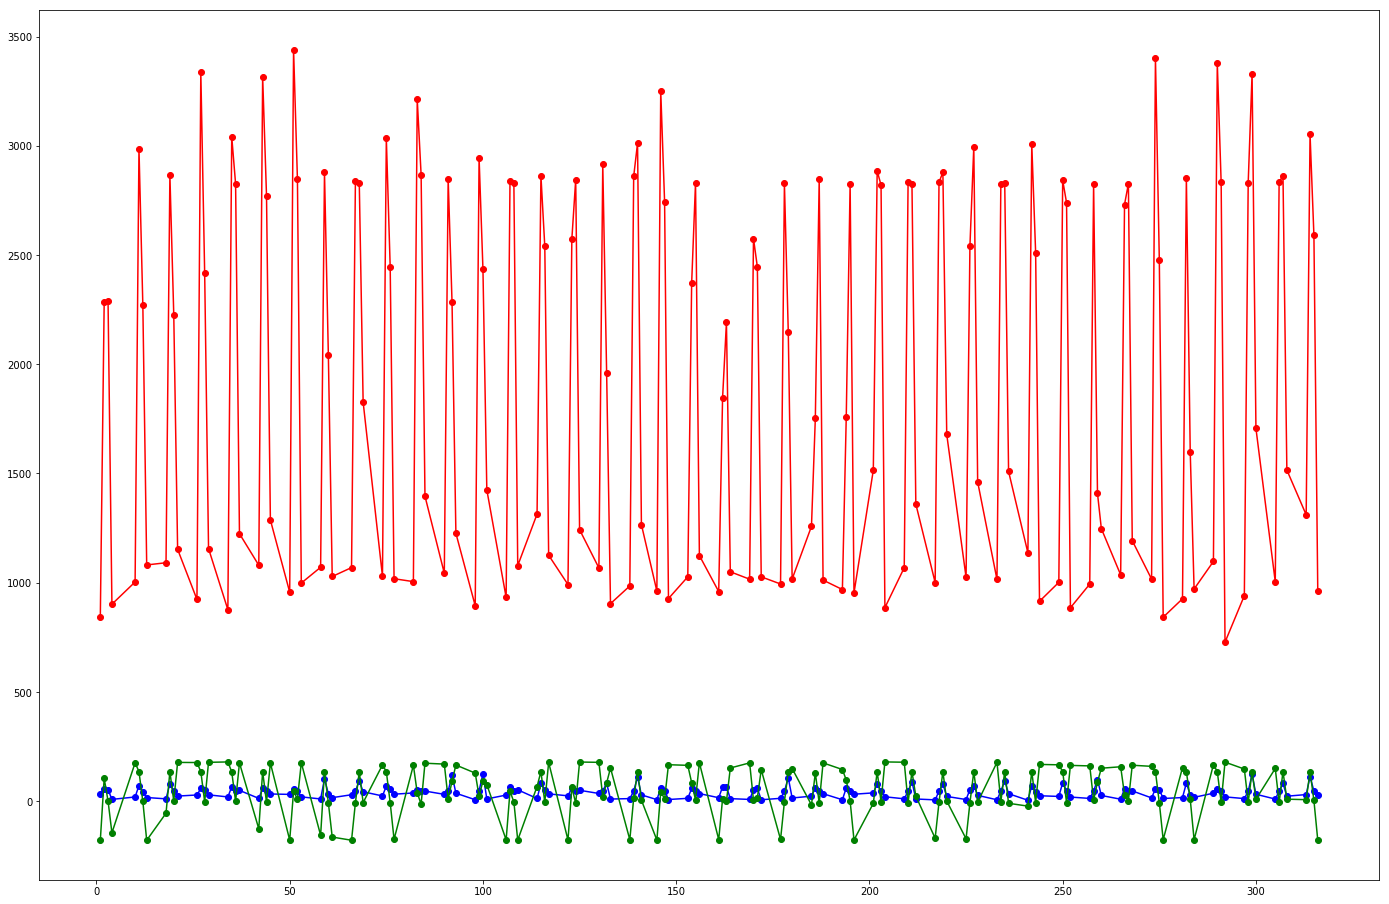

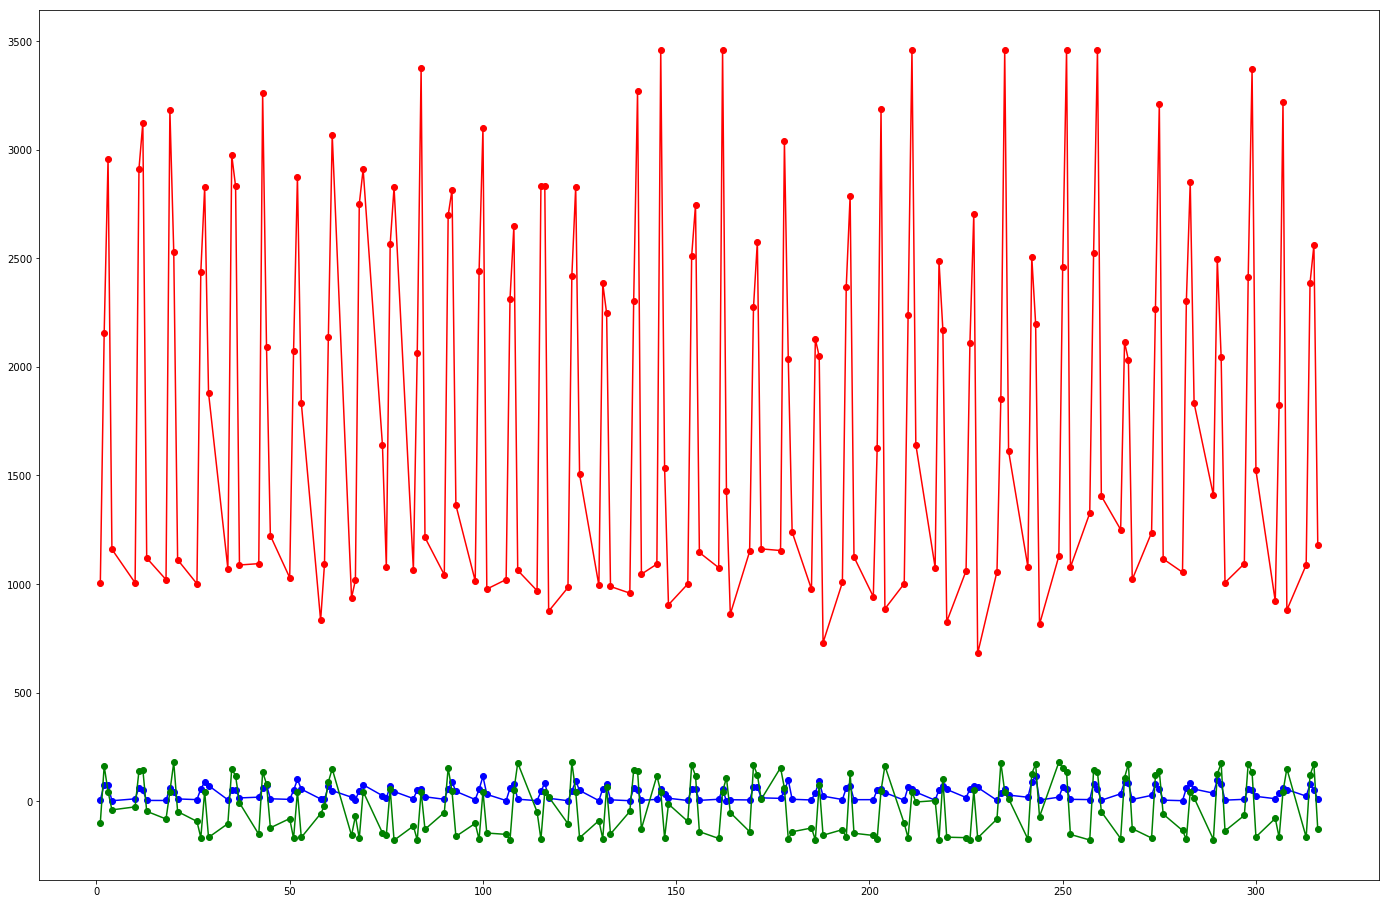

In [12]:
r = df_40_left['r']
theta = df_40_left['theta']
phi = df_40_left['phi']
time = df_40_left['sequence']
plt.figure(figsize=(24,16))
plt.plot(time, r, "ro-")
plt.plot(time, theta, "bo-")
plt.plot(time,phi, "go-")


r = df_40_right['r']
theta = df_40_right['theta']
phi = df_40_right['phi']
time = df_40_right['sequence']
plt.figure(figsize=(24,16))
plt.plot(time, r, "ro-")
plt.plot(time, theta, "bo-")
plt.plot(time,phi, "go-")

#### Plotting the acceleration data of 10 swipes of left and right

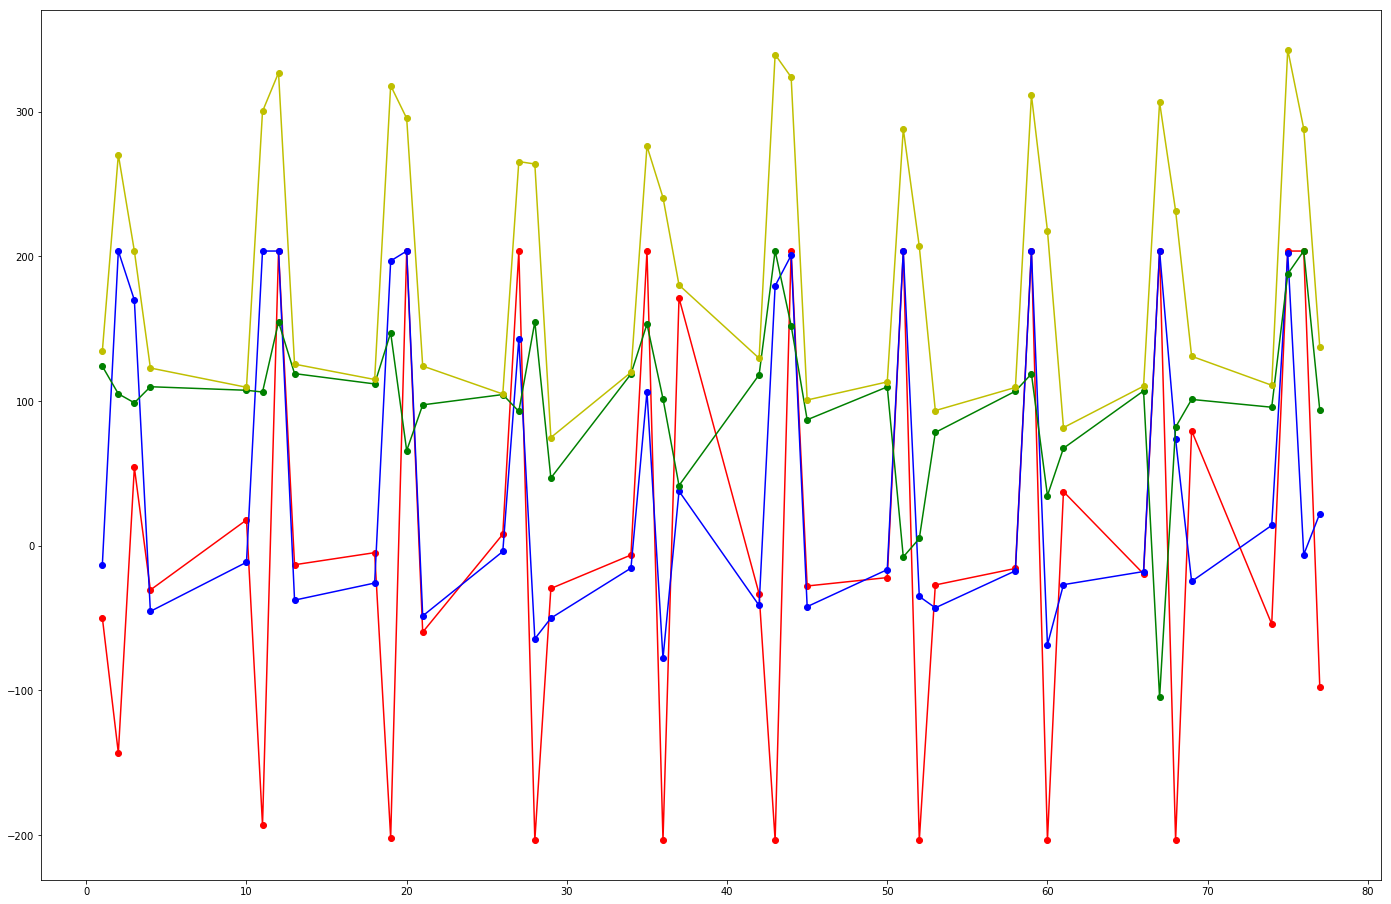

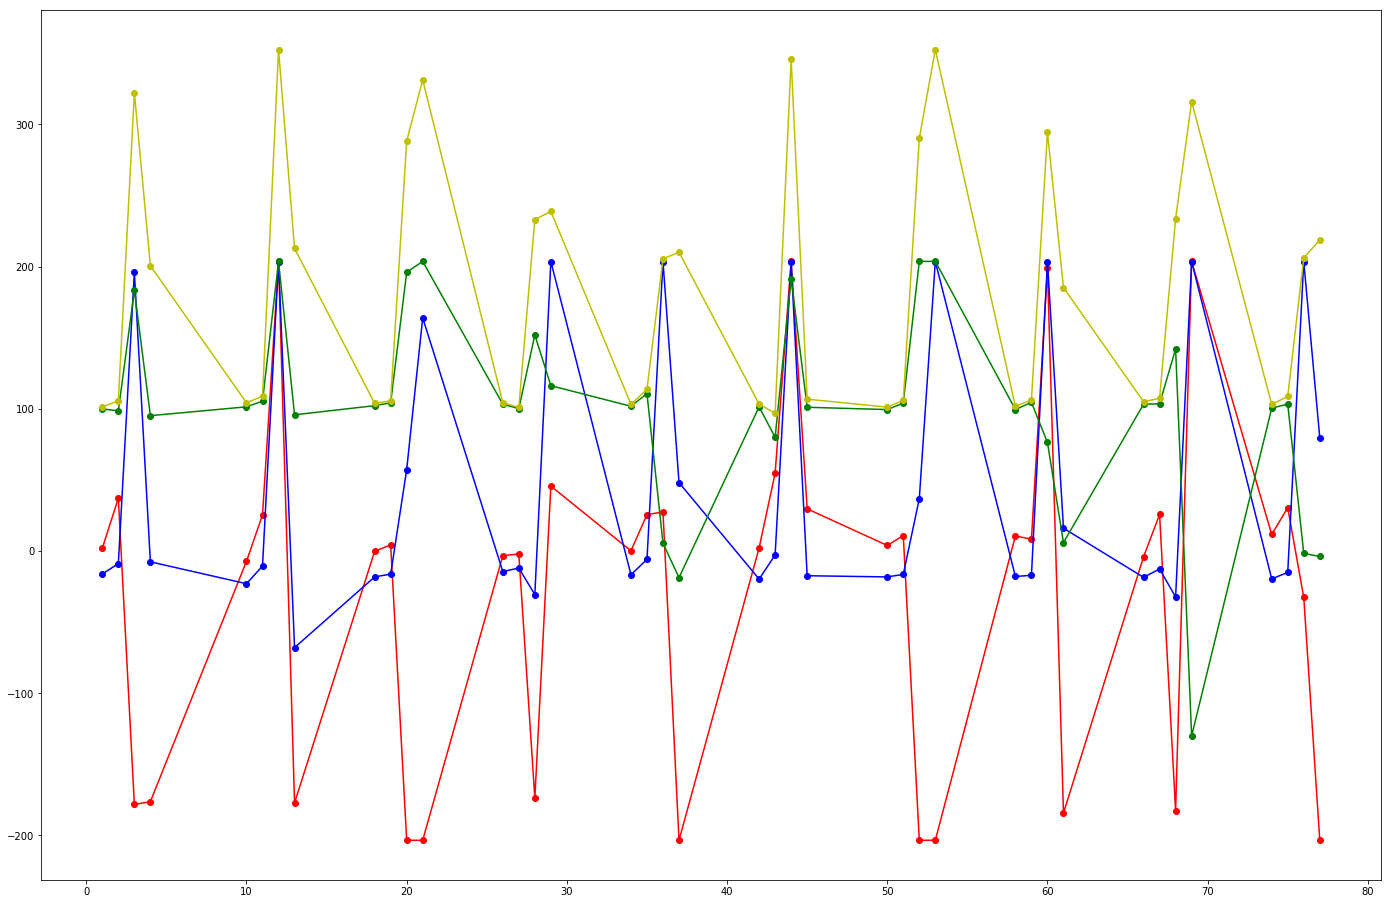

In [13]:
# Dividing acceleration measurements on 9.81 to remove the effect of gravity
acc_x = df_swipe_left['acc_x']/9.81
acc_y = df_swipe_left['acc_y']/9.81
acc_z = df_swipe_left['acc_z']/9.81
acc_abs = df_swipe_left['abs_a']/9.81
time = df_swipe_left[' sequence']
plt.figure(figsize=(24,16))
plt.plot(time, acc_x, "ro-")
plt.plot(time, acc_y, "bo-")
plt.plot(time,acc_z, "go-")
plt.plot(time,acc_abs,"yo-")

acc_x = df_swipe_right['acc_x']/9.81
acc_y = df_swipe_right['acc_y']/9.81
acc_z = df_swipe_right['acc_z']/9.81
acc_abs = df_swipe_right['abs_a']/9.81
time = df_swipe_left[' sequence']
plt.figure(figsize=(24,16))
plt.plot(time, acc_x, "ro-")
plt.plot(time, acc_y, "bo-")
plt.plot(time,acc_z, "go-")
plt.plot(time,acc_abs,"yo-")

### Compressing 4 frames of data into 1
As mentioned in the description, knowing that each swipe occupies four rows in our dataset, we decided to compress swipe data to one frame by taking mean, st, max, min of acceleration and 'phi' measurements as we believe these features are the most relavant in the problem we are trying to solve.


In [14]:
new_df = pd.DataFrame(None, columns = ['avg_acc_x', 'avg_acc_y', 'avg_acc_z', 
                                           'max_acc_x', 'max_acc_y', 'max_acc_z', 
                                           'std_acc_x', 'std_acc_y', 'std_acc_z', 
                                           'avg_phi', 'max_phi', 'min_phi', 'std_phi','label'])

def get_statistics(val_df, window = 4):
    counter = 0
    mod_df = pd.DataFrame(None, columns = ['avg_acc_x', 'avg_acc_y', 'avg_acc_z', 
                                           'max_acc_x', 'max_acc_y', 'max_acc_z', 
                                           'std_acc_x', 'std_acc_y', 'std_acc_z', 
                                           'avg_phi', 'max_phi', 'min_phi', 'std_phi','label'])
    acc_x, acc_y, acc_z, phi = [],[],[],[]
    
    for i in range(len(val_df)):
        counter+=1
        acc_x.append(val_df['acc_x'].iloc[i])
        acc_y.append(val_df['acc_y'].iloc[i])
        acc_z.append(val_df['acc_z'].iloc[i])
        phi.append(val_df['phi'].iloc[i])
    
        if counter % window == 0:
            print(mod_df)
            mod_df = mod_df.append({
                'avg_acc_x': np.mean(acc_x),
                'avg_acc_y': np.mean(acc_y),
                'avg_acc_z': np.mean(acc_z),
                'avg_acc_z': np.mean(acc_z),

    #           acceleration std
                'std_acc_x': np.std(acc_x),
                'std_acc_y': np.std(acc_y),
                'std_acc_z': np.std(acc_z),

    #           acceleration min
                'min_acc_x': min(acc_x),
                'min_acc_y': min(acc_y),
                'min_acc_z': min(acc_z),

    #           acceleration max
                'max_acc_x': max(acc_x),
                'max_acc_y': max(acc_y),
                'max_acc_z': max(acc_z),
                
                'avg_phi': np.mean(phi),
                'max_phi': max(phi),
                'min_phi': min(phi),
                'std_phi': np.std(phi),
                
                'label': val_df['label'].iloc[i]}, 

                ignore_index=True)

            acc_x, acc_y, acc_z, phi = [], [], [], []
            counter = 0
#    print(mod_df)
    return mod_df

# merging swipe_left_files & swipe_right_files arrays

swipe_files = np.concatenate([swipe_left_files,swipe_right_files])
for i in swipe_files:
    df = pd.read_csv(i)
    df['acc_x'] = df['acc_x']/9.81
    df['acc_y']= df['acc_y']/9.81
    df['acc_z'] = df['acc_z']/9.81

    new_df = new_df.append(get_statistics(df, window=4))
    



Empty DataFrame
Columns: [avg_acc_x, avg_acc_y, avg_acc_z, max_acc_x, max_acc_y, max_acc_z, std_acc_x, std_acc_y, std_acc_z, avg_phi, max_phi, min_phi, std_phi, label]
Index: []
   avg_acc_x  avg_acc_y  avg_acc_z   max_acc_x  max_acc_y   max_acc_z  \
0  83.690112   4.536188   92.66055  203.669725  29.459735  103.873598   

    std_acc_x  std_acc_y  std_acc_z  avg_phi  max_phi  min_phi     std_phi  \
0  102.782198  14.443675   8.272597   -4.027  151.412 -176.155  116.181717   

        label  min_acc_x  min_acc_y  min_acc_z  
0  swipe left  -25.79001   -4.79103  80.632008  
   avg_acc_x  avg_acc_y   avg_acc_z   max_acc_x  max_acc_y   max_acc_z  \
0  83.690112   4.536188   92.660550  203.669725  29.459735  103.873598   
1  96.151886  16.946993  125.433231  203.669725  53.822630  165.137615   

    std_acc_x  std_acc_y  std_acc_z  avg_phi  max_phi  min_phi     std_phi  \
0  102.782198  14.443675   8.272597   -4.027  151.412 -176.155  116.181717   
1  107.529007  21.819283  26.334490   84.

8  swipe left  -25.076453  -0.305810   97.349643  
Empty DataFrame
Columns: [avg_acc_x, avg_acc_y, avg_acc_z, max_acc_x, max_acc_y, max_acc_z, std_acc_x, std_acc_y, std_acc_z, avg_phi, max_phi, min_phi, std_phi, label]
Index: []
   avg_acc_x  avg_acc_y   avg_acc_z   max_acc_x   max_acc_y  max_acc_z  \
0  20.005097   42.66055  113.914373  185.423038  182.262997  141.38634   

   std_acc_x  std_acc_y  std_acc_z   avg_phi  max_phi  min_phi     std_phi  \
0  96.484604  80.678082  28.142358 -54.99675  104.066 -179.005  113.922657   

        label  min_acc_x  min_acc_y  min_acc_z  
0  swipe left -46.992864  -9.683996  72.069317  
   avg_acc_x  avg_acc_y   avg_acc_z   max_acc_x   max_acc_y   max_acc_z  \
0  20.005097  42.660550  113.914373  185.423038  182.262997  141.386340   
1 -26.605505  50.025484  118.476045  150.866463  203.567788  175.535168   

    std_acc_x  std_acc_y  std_acc_z   avg_phi  max_phi  min_phi     std_phi  \
0   96.484604  80.678082  28.142358 -54.99675  104.066 -179.00

   avg_acc_x  avg_acc_y   avg_acc_z   max_acc_x   max_acc_y   max_acc_z  \
0  79.077472  73.470948  155.377166  203.669725  202.854230  203.669725   
1  60.754332  45.285423  102.217125  203.669725  102.038736  203.669725   
2   3.695209  67.838940   91.462793  203.669725  203.567788  203.669725   
3   9.276249  47.375127  151.070336  203.669725  203.567788  192.456677   
4  21.865443  51.172273   90.010194  203.669725  202.242610  203.669725   
5  72.069317  54.434251  150.025484  203.669725  195.922528  203.669725   
6  -7.900102  46.534149  151.172273  162.385321  203.567788  203.058104   
7  64.424057  52.803262  123.419980  203.669725  203.567788  203.669725   

    std_acc_x  std_acc_y   std_acc_z    avg_phi  max_phi  min_phi     std_phi  \
0  125.381173  80.970915   47.518972  104.49550  180.000   21.697   71.733191   
1  132.343098  40.144038   66.694731   98.80825  174.592   17.448   75.367008   
2  125.302747  79.902603   77.105853  111.11650  178.392   12.446   60.748945   


6  swipe left -203.669725 -20.591233  70.030581  
   avg_acc_x  avg_acc_y   avg_acc_z   max_acc_x   max_acc_y   max_acc_z  \
0 -18.348624  47.477064  125.942915  160.958206  203.567788  198.165138   
1 -15.825688  49.133537  100.560652  203.567788  203.567788  189.602446   
2  36.034659  46.992864   99.413863  203.567788  141.997961  203.669725   
3  76.936799  37.767584  136.060143  203.567788  112.945973  203.669725   
4 -11.391437  46.330275  132.441386  199.796126  203.567788  193.476045   
5 -44.724771  56.218145   92.278287   77.166157  203.567788  143.017329   
6 -22.145770  49.643221  138.251784  203.567788  203.567788  203.669725   
7  18.348624  51.656473   66.692151  203.567788  203.567788  203.669725   

    std_acc_x  std_acc_y   std_acc_z    avg_phi  max_phi  min_phi     std_phi  \
0  129.908742  90.628963   43.130862   68.25075  167.767  -23.096   84.142678   
1  144.874937  90.158273   56.777264  114.39175  166.001   -6.768   70.997272   
2   98.757518  55.352574   79.5

6  swipe left -203.669725 -43.017329   -7.849134  
   avg_acc_x  avg_acc_y   avg_acc_z   max_acc_x   max_acc_y   max_acc_z  \
0 -42.431193  78.567788  109.327217   54.026504  203.567788  123.955148   
1   3.695209  89.475025  121.738022  203.567788  203.567788  154.638124   
2 -15.749235  81.447503  105.428135  203.567788  203.567788  147.094801   
3  -5.479103   6.039755   99.617737  203.567788  142.813456  154.638124   
4  41.131498  12.614679  103.669725  203.567788  106.422018  153.109072   
5 -15.341488  74.133537  140.188583  203.567788  200.611621  203.669725   
6 -12.359837  27.191641   46.228338  203.567788  203.567788  109.683996   
7   5.351682  22.629969   81.804281  203.567788  203.465851  118.654434   

    std_acc_x   std_acc_y  std_acc_z   avg_phi  max_phi  min_phi     std_phi  \
0   70.133421  109.322367   9.318300 -22.81975  125.147 -164.754  123.830050   
1  140.738738  114.468112  19.634596   9.03875  133.513 -109.358   90.238708   
2  145.593096  119.001663  29.262

6  swipe left -203.669725 -52.599388   97.859327  
   avg_acc_x  avg_acc_y   avg_acc_z   max_acc_x   max_acc_y   max_acc_z  \
0  20.693170  52.013252  136.467890  203.567788  162.996942  203.669725   
1 -21.202854  68.221203  153.287462  203.567788  197.655454  203.669725   
2  -4.179409  83.231397  121.024465  141.794088  201.834862  152.293578   
3  -8.843017  59.582059  158.639144  203.567788  203.567788  203.669725   
4 -17.405708  33.307849   46.967380  203.567788  200.917431  108.358818   
5 -11.340469  66.513761  142.074414  203.567788  200.611621  203.669725   
6 -13.965341  79.892966  152.293578  203.567788  201.529052  203.669725   
7 -12.028542  61.799185  152.370031  203.567788  200.917431  203.669725   

    std_acc_x   std_acc_y  std_acc_z   avg_phi  max_phi  min_phi     std_phi  \
0  109.741865   64.641892  41.727426  89.48800  174.381    8.093   59.978615   
1  150.539101  108.837367  45.256746  -7.66025  142.992 -152.052  111.358308   
2  103.198310  118.071804  22.263

7  swipe right -203.669725 -13.149847   76.962283  
   avg_acc_x  avg_acc_y   avg_acc_z   max_acc_x   max_acc_y   max_acc_z  \
0   0.560652  63.175331   89.933741  203.669725  203.567788  118.144750   
1 -95.922528  72.400612  138.226300   18.042813  168.603466  203.669725   
2  12.920489  45.998981  139.984709  203.669725  203.567788  195.718654   
3 -44.495413  24.694190   75.586137  203.669725  203.567788  133.843017   
4 -69.877676  75.917431  146.049949   29.459735  203.567788  191.946993   
5 -53.134557  92.201835  111.467890   36.391437  203.567788  166.156983   
6 -26.044852  31.396534   72.324159  203.669725  203.567788  135.066259   
7 -44.113150  76.427115  118.476045   16.717635  203.567788  203.669725   
8  -5.733945  36.085627  113.353721  203.669725  203.567788  189.398573   

    std_acc_x   std_acc_y  std_acc_z   avg_phi  max_phi  min_phi     std_phi  \
0  144.032504   86.488655  24.628169  17.38625  162.212  -98.130   97.875868   
1  107.836872   80.501207  39.718546 

7  swipe right -203.669725 -17.533129  48.725790  
    avg_acc_x  avg_acc_y   avg_acc_z   max_acc_x   max_acc_y   max_acc_z  \
0   47.808359  49.260958  136.136595  203.669725  203.567788  203.669725   
1  -77.420999  62.996942  108.460754   31.804281  203.567788  116.513761   
2  -32.441386  44.138634  103.338430  114.475025  203.567788  203.669725   
3  -31.753313  43.883792   81.600408   45.973496  203.567788  165.749235   
4 -101.019368  32.823649  104.816514   -9.480122  203.567788  118.246687   
5   -6.167176  49.617737  112.410805  172.884811  203.567788  184.505607   
6   27.752294  36.773700  130.810398  203.669725  203.567788  203.669725   
7  -75.178389  44.852192   96.253823    9.480122  203.567788  150.458716   
8  -26.503568  45.565749   85.728848  164.118247  203.567788  121.916412   

    std_acc_x   std_acc_y  std_acc_z    avg_phi  max_phi  min_phi     std_phi  \
0   90.407597   89.218648  44.248468  -17.45750  108.434 -171.078  105.536748   
1   93.548037   84.128744 

4  swipe right -203.669725 -20.489297   46.075433  
    avg_acc_x  avg_acc_y   avg_acc_z   max_acc_x   max_acc_y   max_acc_z  \
0  -99.566769  59.811417  130.657492    5.402650  203.567788  203.669725   
1    6.345566  28.669725  112.793068  203.669725  203.567788  192.354740   
2  -75.509684  60.932722  120.846075   -2.140673  203.465851  151.580020   
3 -100.382263  45.107034  126.121305   -0.305810  203.567788  203.669725   
4  -95.158002  43.501529   77.217125    9.378186  163.608563  103.873598   
5  -70.158002  65.188583   74.923547    3.567788  203.567788  107.033639   

    std_acc_x   std_acc_y  std_acc_z   avg_phi  max_phi  min_phi     std_phi  \
0  104.104759   92.149298  42.214783  15.53850  159.224 -156.314  134.898519   
1  144.297046  101.549375  49.050061 -81.15975   44.985 -166.953   87.816957   
2   76.739739   90.585412  21.116239  -9.09675  159.727 -164.970  141.189298   
3   95.703357   92.855878  45.054069  29.85625  174.937 -112.190  125.525692   
4   99.334508  

3  swipe right -203.669725 -12.436290    2.446483  
    avg_acc_x  avg_acc_y   avg_acc_z  max_acc_x   max_acc_y   max_acc_z  \
0  -96.355759  55.402650   21.788991   2.752294  203.567788  104.077472   
1 -114.984709  73.649337  132.262997 -15.290520  203.567788  203.669725   
2 -104.383282  86.671764  129.383282   8.154944  203.567788  203.669725   
3  -88.583078  52.726809   58.205912  -8.970438  203.567788  105.096840   
4  -92.278287  89.424057  112.334353   5.402650  196.330275  181.039755   

   std_acc_x  std_acc_y  std_acc_z   avg_phi  max_phi  min_phi     std_phi  \
0  82.759887  86.786015  80.013322  13.27225  171.479 -174.207  141.695787   
1  89.026024  85.911210  41.227261  79.00875  179.373 -152.525  134.598582   
2  99.727642  93.305124  59.609995  12.99900  143.120 -178.090  134.220785   
3  71.085918  88.765953  46.362589  -4.18100  171.488 -171.469  147.020668   
4  76.948996  99.557539  48.801171   7.62700  138.318 -169.026  127.847919   

         label   min_acc_x  

   avg_acc_x  avg_acc_y   avg_acc_z   max_acc_x   max_acc_y   max_acc_z  \
0 -22.757390  32.492355  117.252803  203.669725  203.567788  160.550459   
1 -19.673802  38.073394  125.127421  203.669725  203.567788  203.669725   
2  -3.746177  40.239551  119.597350  203.669725  203.567788  151.885831   
3 -44.087666  35.601427  115.621814   41.997961  203.567788  182.772681   

    std_acc_x  std_acc_y  std_acc_z   avg_phi  max_phi  min_phi     std_phi  \
0  150.269595  99.629452  26.622623 -87.19675   44.985 -168.759   88.684346   
1  151.963239  95.788175  51.587146 -79.89400   44.985 -176.334   93.871237   
2  144.588203  95.077595  18.969063  -0.07400  176.014 -170.956  127.244376   
3  100.431974  99.081163  39.433561 -17.62050  105.424 -165.304   96.543204   

         label   min_acc_x  min_acc_y   min_acc_z  
0  swipe right -203.669725 -45.056065   90.621814  
1  swipe right -203.669725 -28.032620   62.589195  
2  swipe right -203.669725 -32.415902  103.465851  
3  swipe right -203.

3  swipe right -203.669725 -13.353721  -28.338430  
   avg_acc_x  avg_acc_y   avg_acc_z   max_acc_x   max_acc_y   max_acc_z  \
0 -21.763507  54.765545  101.605505   39.347604  203.567788  172.782875   
1 -90.800204  63.888889  137.742100   49.541284  128.542304  203.669725   
2  -4.332314  66.641182   86.926606  151.376147  203.567788  197.553517   
3 -86.850153  46.687054   82.696228   -1.732926  203.567788  138.939857   
4  14.449541  47.451580  128.465851  203.669725  203.567788  161.365953   

    std_acc_x  std_acc_y  std_acc_z   avg_phi  max_phi  min_phi     std_phi  \
0   78.632513  85.964348  49.188196  79.94650  179.142    4.444   63.852536   
1  114.528962  63.553951  38.768320  46.71925  148.341 -121.059  111.689047   
2   96.071756  85.238408  88.271953  65.08900  179.540 -116.565  114.525447   
3   82.728574  90.723379  65.179731  12.59350  179.655 -140.691  140.005852   
4  141.885046  91.414791  26.512327 -72.94800   44.985 -178.169  102.574496   

         label   min_a

In [15]:
#convert labels to numerical values
new_df['label'] = new_df['label'].replace('swipe right', float(1))
new_df['label'] = new_df['label'].replace('swipe left', float(0))



#### Above manipulated data is placed in one data frame (new_df) which is what we will use for all the models below.

In [16]:
import seaborn as sns
import keras 
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss, accuracy_score

from keras.callbacks import EarlyStopping, ModelCheckpoint


from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Dropout      # create layers

from sklearn.ensemble import BaggingClassifier

categorical = ['label']

label = preprocessing.LabelEncoder()
for col in categorical:
    new_df[col] = label.fit_transform(new_df[col].astype(str))
print(new_df[['label']])

Using TensorFlow backend.


    label
0       0
1       0
2       0
3       0
4       0
..    ...
5       1
6       1
7       1
8       1
9       1

[220 rows x 1 columns]


### Dividing the dataset into train and test data with 80:20 ratio.

In [17]:
# Splitting the dataset into A_train, A_test, B_Train, B_test
# Stratifying on label

A_train, A_test, B_train, B_test = train_test_split(new_df.loc[:, new_df.columns != 'label'], new_df.label, test_size=0.2, random_state=107, stratify=new_df.label)

# Confirming the ratio for B_train & B_test
B_train.value_counts(normalize=True), B_test.value_counts(normalize=True)


(1    0.5
 0    0.5
 Name: label, dtype: float64,
 1    0.5
 0    0.5
 Name: label, dtype: float64)

In [18]:
# Priting shapes
print(A_train.shape)
print(A_test.shape)

(176, 16)
(44, 16)


### Assesing different classifiers to see find the most appropriate model for our problem


**Logistic Regression**

In [20]:
model = LogisticRegression(C=1000, random_state=107, max_iter=100, solver='liblinear')
model.fit(A_train,B_train)
predictions = model.predict_proba(A_test)
logistic_reg_log_loss = log_loss(B_test, predictions[:,1])
print(logistic_reg_log_loss)

print(accuracy_score(B_test, predictions[:,1]>0.5), accuracy_score(B_test,np.zeros(B_test.shape)))

0.27409990378157567
0.8863636363636364 0.5


**Scaled Logistic Regression**

In [21]:
scaler = StandardScaler().fit(A_train.astype(np.float64)) #to float64 to avoid warning.
train_scaled = scaler.transform(A_train.astype(np.float64))
test_scaled = scaler.transform(A_test.astype(np.float64))

model = LogisticRegression(C=0.11, random_state=107,penalty='l2' ,max_iter=100, solver='liblinear')
model.fit(train_scaled,B_train)
predictions = model.predict_proba(test_scaled)
scaled_log_loss = log_loss(B_test, predictions[:,1])
print(scaled_log_loss)




0.30635714735051556


**Bagging Classifier**

In [22]:
model = BaggingClassifier(random_state=107, n_estimators=100)
model.fit(A_train, B_train)
predictions = model.predict_proba(A_test)
bagging_log_loss = log_loss(B_test, predictions[:,1])
print(bagging_log_loss)


0.19433739149002885


**Random Forest**

In [23]:
model = RandomForestClassifier(n_estimators = 500, random_state = 107)
model.fit(A_train,B_train)
preds = model.predict_proba(A_test)
rf_log_loss = log_loss(B_test, preds[:,1])
print(rf_log_loss)


0.2057834714399238


**Neural Network**

In [24]:
model = Sequential()

model.add(Dense(units = 40, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 16))
model.add(Dense(units = 38, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 36, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 34, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 28, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 27, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 25, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 20, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 15, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 10, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
print(model.summary())
# Compiling the ANN
model.compile(optimizer = 'Nadam', 
              loss = 'binary_crossentropy' ,
              metrics = ['accuracy'])

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=4),
             ModelCheckpoint(filepath='best_performance.h5', monitor='val_loss', save_best_only=True)]

# Train the ANN
history = model.fit(train_scaled, B_train, batch_size = 256, epochs = 50, 
                    callbacks=callbacks, # Early stopping
                    validation_data = (test_scaled, B_test))

nn_log_loss = model.evaluate(test_scaled, B_test)[0]
print(nn_log_loss)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                680       
_________________________________________________________________
dense_2 (Dense)              (None, 38)                1558      
_________________________________________________________________
dense_3 (Dense)              (None, 36)                1404      
_________________________________________________________________
dense_4 (Dense)              (None, 34)                1258      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1120      
_________________________________________________________________
dense_6 (Dense)              (None, 28)                924       
_________________________________________________________________
dense_7 (Dense)              (None, 27)               

#### Create a table to compare all the validation log losses.

In [25]:
data = {'Model':['Logistic Regression', 'Scaled Logistic Regression', 'Bagged Decision Tree', 'Random Forest', 'NN Model'],
        'Logloss':[logistic_reg_log_loss, scaled_log_loss, bagging_log_loss, rf_log_loss, nn_log_loss]}
pd.DataFrame(data)


,Model,Logloss
0,Logistic Regression,0.274100
1,Scaled Logistic Regression,0.306357
2,Bagged Decision Tree,0.194337
3,Random Forest,0.205783
4,NN Model,0.391739


### Conclusion
Even though no model gave us excellence performace, Random Forest and Bagged Decision tree performed relatively well as their values are the most minimal compared to other models. Therefore, we will choose one of those to implement our swipes.

## Trial 2 - Raw Data
### We decided to repeat the exact same model analysis processes but this time on a raw data. So, instead of feeding models with preprocessed data, we just feed them with raw data of 220 swipes - 110 left swipe & 110 right swipe

In [26]:
#convert labels to numerical values
df_all_swipes['label'] = df_all_swipes['label'].replace('swipe right', float(1))
df_all_swipes['label'] = df_all_swipes['label'].replace('swipe left', float(0))
#print(df_all_swipes)

In [55]:
import seaborn as sns
import keras 
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm #Linear Regression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss, accuracy_score

from keras.callbacks import EarlyStopping, ModelCheckpoint


from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Dropout      # create layers

from sklearn.ensemble import BaggingClassifier

categorical = ['label']

label = preprocessing.LabelEncoder()
for col in categorical:
    df_all_swipes[col] = label.fit_transform(df_all_swipes[col].astype(str))
print(df_all_swipes[['label']])


     label
0        0
1        0
2        0
3        0
4        0
..     ...
875      1
876      1
877      1
878      1
879      1

[880 rows x 1 columns]


In [56]:
x_train, x_test, y_train, y_test = train_test_split(df_all_swipes.loc[:, df_all_swipes.columns != 'label'], df_all_swipes.label, test_size=0.2, random_state=107, stratify=df_all_swipes.label)
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(1    0.5
 0    0.5
 Name: label, dtype: float64,
 1    0.5
 0    0.5
 Name: label, dtype: float64)

In [57]:
x_train.shape


(704, 11)

**Logistic Regression**

In [58]:
model = LogisticRegression(C=1000, random_state=107, max_iter=100, solver='liblinear')
model.fit(x_train,y_train)
predictions = model.predict_proba(x_test)
logistic_reg_log_loss = log_loss(y_test, predictions[:,1])
print(logistic_reg_log_loss)

print(accuracy_score(y_test, predictions[:,1]>0.5), accuracy_score(y_test,np.zeros(y_test.shape)))

0.6385703556155246
0.6363636363636364 0.5


In [59]:
#scaled logistic regression

scaler = StandardScaler().fit(x_train.astype(np.float64)) #to float64 to avoid warning.
train_scaled = scaler.transform(x_train.astype(np.float64))
test_scaled = scaler.transform(x_test.astype(np.float64))

model = LogisticRegression(C=0.11, random_state=107,penalty='l2' ,max_iter=100, solver='liblinear')
model.fit(train_scaled,y_train)
predictions = model.predict_proba(test_scaled)
scaled_log_loss = log_loss(y_test, predictions[:,1])
print(scaled_log_loss)

0.6504347248792016


In [60]:
#begging classifier

model = BaggingClassifier(random_state=107, n_estimators=100)
model.fit(x_train, y_train)
predictions = model.predict_proba(x_test)
bagging_log_loss = log_loss(y_test, predictions[:,1])
print(bagging_log_loss)

0.3138996719299349


In [61]:
#random forrest

model = RandomForestClassifier(n_estimators = 500, random_state = 107)
model.fit(x_train,y_train)
preds = model.predict_proba(x_test)
rf_log_loss = log_loss(y_test, preds[:,1])
print(rf_log_loss)

0.33734189267418063


In [62]:
model = Sequential()

model.add(Dense(units = 40, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 11))
model.add(Dense(units = 38, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 36, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 34, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 28, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 27, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 25, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 20, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 15, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 10, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
print(model.summary())
# Compiling the ANN
model.compile(optimizer = 'Nadam', 
              loss = 'binary_crossentropy' ,
              metrics = ['accuracy'])

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=4),
             ModelCheckpoint(filepath='best_performace.h5', monitor='val_loss', save_best_only=True)]

# Train the ANN
history = model.fit(train_scaled, y_train, batch_size = 256, epochs = 50, 
                    callbacks=callbacks, # Early stopping
                    validation_data = (test_scaled, y_test))

nn_log_loss = model.evaluate(test_scaled, y_test)[0]
print(nn_log_loss)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 40)                480       
_________________________________________________________________
dense_28 (Dense)             (None, 38)                1558      
_________________________________________________________________
dense_29 (Dense)             (None, 36)                1404      
_________________________________________________________________
dense_30 (Dense)             (None, 34)                1258      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                1120      
_________________________________________________________________
dense_32 (Dense)             (None, 28)                924       
_________________________________________________________________
dense_33 (Dense)             (None, 27)               

In [63]:
data = {'Model':['Logistic Regression', 'Scaled Logistic Regression', 'Bagged Decision Tree', 'Random Forest', 'NN Model'],
        'Logloss':[logistic_reg_log_loss, scaled_log_loss, bagging_log_loss, rf_log_loss, nn_log_loss]}
pd.DataFrame(data)

,Model,Logloss
0,Logistic Regression,0.638570
1,Scaled Logistic Regression,0.650435
2,Bagged Decision Tree,0.313900
3,Random Forest,0.337342
4,NN Model,0.544233


# Conclusion
#### We observe that feeding models with preprocessed data gave more successful results than raw data. Therefore, we will go with the conclusion we made while analysing the results from preprocessed data.